In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data_Result = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/metadata_breast_dataset.csv')
Data_Result

,Unnamed: 0,SampleID,Label,Age,Run_GW,Run_TMD
0,0,LBMB011,cancer,63,R1101,R957
1,1,LBMB043,cancer,57,R1328,R1327
2,2,LBMB198,cancer,64,R1101,R957
3,3,LBMB200,cancer,62,R1101,R957
4,4,LBMB203,cancer,48,R1101,R957
...,...,...,...,...,...,...
132,235,LBGS099,control,30,R1475,R1475
133,242,LBGS106,control,55,R1475,R1475
134,245,LBGS109,control,62,R1475,R1475
135,246,CRCC12,control,27,R1490,R1481


In [ ]:
Data_GWFT_flen = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWFP_flen_range_100_250.csv')
Data_GWFT_short = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWFP_short.csv')
Data_GWMD = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWMD_short.csv')
Data_TMD = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/TMD_short.csv')
Data_Result = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/metadata_breast_dataset.csv')

Data_full = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Datafull.csv')
Data_full_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Datafull_PCA.csv')

Data_GWFT_flen_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFT_flen_PCA.csv')
Data_GWMD_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GMD_PCA.csv')
Data_TMD_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_TMD_PCA.csv')

Data_GWFT_flen_cleaned = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFT_flen_cleaned.csv')

In [ ]:
Data_Result
#Chuyển Label - số 1, 0
Data_Result["label_number"] =  Data_Result.Label.apply(lambda x: int(x=="cancer"))
Data_Result.drop(columns=['Unnamed: 0'])
Data_Result.head()

,Unnamed: 0,SampleID,Label,Age,Run_GW,Run_TMD,label_number
0,0,LBMB011,cancer,63,R1101,R957,1
1,1,LBMB043,cancer,57,R1328,R1327,1
2,2,LBMB198,cancer,64,R1101,R957,1
3,3,LBMB200,cancer,62,R1101,R957,1
4,4,LBMB203,cancer,48,R1101,R957,1


In [ ]:
ID = pd.DataFrame(Data_Result.label_number)

In [ ]:
Data_full_PCA['label'] = ID.values
Data_full_PCA.drop(columns=['Unnamed: 0'])

,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,GWMD_PCA6,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
0,-2.252113,0.899453,0.019169,-22.626602,-0.955284,-4.154077,-1.035126,-3.663447,-0.765360,1.007548,...,1.577601,-0.437137,-0.245068,0.502285,0.403958,-0.392424,-0.631680,-0.547160,0.175688,1
1,-4.870362,0.872972,-0.408866,10.580418,-0.033179,0.933630,-0.083309,0.131926,0.465117,0.401134,...,0.257702,1.727577,-0.755605,1.381055,-0.730707,1.925221,1.448810,-1.597787,-0.213117,1
2,-3.479735,0.198917,-3.157495,-29.393621,-1.225883,-4.060452,-1.008121,-4.126151,-1.250710,-0.014787,...,-0.365554,0.237336,-0.835937,0.144068,-0.054625,-0.945028,-0.576254,-0.925104,0.658569,1
3,-0.600841,2.045409,-3.191008,-18.907390,-0.974975,-3.723416,-0.743967,-3.601837,-1.513645,0.312149,...,2.325722,-1.091551,0.384515,0.891492,0.568381,0.501201,-0.298907,-0.502665,1.290628,1
4,-6.930095,-1.376692,1.074311,-14.833990,-0.117016,-0.285712,-1.786169,-2.420782,0.610925,-0.181394,...,-0.138448,-0.173962,0.076610,0.012057,-0.076024,0.063701,0.044871,0.248054,-0.183889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,21.170894,-3.051210,-5.911851,14.702557,-0.416178,0.462885,-0.075963,0.424256,0.654389,1.098050,...,-2.285225,-0.221851,-0.488331,1.760465,-1.155121,1.584240,-1.150324,0.102925,0.934707,0
133,21.826918,-3.706093,-5.474218,20.403415,-0.683521,0.537625,-0.766408,0.287333,0.153537,0.990772,...,0.084059,1.218026,-2.273921,-0.575008,-0.744358,-0.401741,-0.216370,-0.689311,-0.393442,0
134,23.997792,-5.400871,-2.362513,22.249009,-0.289187,0.279221,-1.316839,2.084294,0.487301,1.710864,...,-2.530112,2.344992,1.139719,1.689523,-1.413931,-0.341317,0.824800,-0.539348,0.142808,0
135,25.746313,-3.976045,-1.174804,9.364984,-0.590986,-0.505449,-0.135786,0.826366,-0.491360,0.869414,...,-0.268737,0.642443,-1.697984,-0.089192,-1.489628,-0.508833,-1.464110,1.938426,1.268311,0


In [ ]:
Data_Result["label_number"] =  Data_Result.Label.apply(lambda x: int(x=="cancer"))
Data_Result_cleaned = Data_Result.set_index("SampleID").drop("Unnamed: 0", axis=1)
Data_Result_cleaned = Data_Result_cleaned.rename_axis(index=None)
Data_Result_cleaned

,Label,Age,Run_GW,Run_TMD,label_number
LBMB011,cancer,63,R1101,R957,1
LBMB043,cancer,57,R1328,R1327,1
LBMB198,cancer,64,R1101,R957,1
LBMB200,cancer,62,R1101,R957,1
LBMB203,cancer,48,R1101,R957,1
...,...,...,...,...,...
LBGS099,control,30,R1475,R1475,0
LBGS106,control,55,R1475,R1475,0
LBGS109,control,62,R1475,R1475,0
CRCC12,control,27,R1490,R1481,0


In [ ]:
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


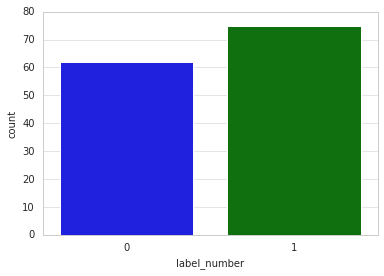

In [ ]:
sns.set_style('whitegrid')
sns.countplot(Data_Result['label_number'], label = "Count")

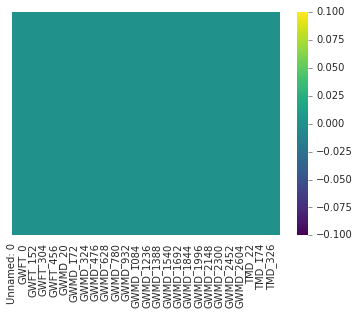

In [ ]:
sns.heatmap(Data_full.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
Data_full_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 174 entries, Unnamed: 0 to label
dtypes: float64(172), int64(2)
memory usage: 186.4 KB


In [ ]:
Data_full_PCA.describe()

,Unnamed: 0,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
count,137.000000,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,...,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,137.000000
mean,68.000000,6.483054e-16,-4.376062e-16,-2.868751e-16,3.319324e-15,4.444944e-16,-2.860648e-16,6.807207e-17,1.734217e-16,3.889832e-17,...,2.220446e-16,-1.474895e-16,8.103818e-17,5.348520e-17,3.889832e-17,-2.050266e-16,-3.241527e-17,-1.401960e-16,-3.499836e-17,0.547445
std,39.692569,1.113538e+01,4.188974e+00,2.551744e+00,1.899606e+01,1.266726e+01,1.243823e+01,1.197715e+01,1.189558e+01,1.174728e+01,...,1.126802e+00,1.119211e+00,1.095597e+00,1.091395e+00,1.085325e+00,1.072202e+00,1.057696e+00,1.044285e+00,1.041675e+00,0.499570
min,0.000000,-1.593754e+01,-9.150253e+00,-6.277192e+00,-4.136635e+01,-7.999118e+01,-5.875880e+01,-4.675748e+01,-4.784260e+01,-7.247675e+01,...,-2.615100e+00,-2.729582e+00,-3.287991e+00,-2.878458e+00,-3.631997e+00,-2.882699e+00,-2.746136e+00,-3.022092e+00,-3.161036e+00,0.000000
25%,34.000000,-6.565166e+00,-3.048959e+00,-1.605317e+00,-1.435485e+01,-8.847081e-01,-2.370069e+00,-1.129688e+00,-2.987031e+00,-8.116679e-01,...,-7.056201e-01,-5.729607e-01,-8.070507e-01,-5.970104e-01,-6.093494e-01,-4.530014e-01,-6.841188e-01,-6.098759e-01,-5.618123e-01,0.000000
50%,68.000000,-3.482799e+00,-3.255218e-01,-6.015404e-02,-3.011308e+00,-4.107681e-01,-1.267637e+00,-8.973162e-01,-1.364798e+00,-1.760719e-01,...,-1.342165e-01,-1.225243e-02,4.598418e-02,1.739070e-02,-2.812831e-02,-4.541040e-04,7.870238e-03,-1.267159e-01,3.798722e-02,1.000000
75%,102.000000,2.896195e-01,1.481164e+00,1.831065e+00,1.001591e+01,-3.317856e-02,4.628850e-01,-6.394277e-01,4.242564e-01,3.779349e-01,...,7.367625e-01,6.863370e-01,6.143509e-01,5.657072e-01,6.198751e-01,4.394922e-01,7.092526e-01,5.282709e-01,5.583668e-01,1.000000
max,136.000000,3.343293e+01,1.250158e+01,7.533555e+00,5.254470e+01,9.990294e+01,9.210274e+01,1.105276e+02,1.017973e+02,8.751574e+01,...,3.009911e+00,4.153847e+00,3.566134e+00,3.378483e+00,3.937801e+00,4.705704e+00,3.172783e+00,3.837557e+00,3.419653e+00,1.000000


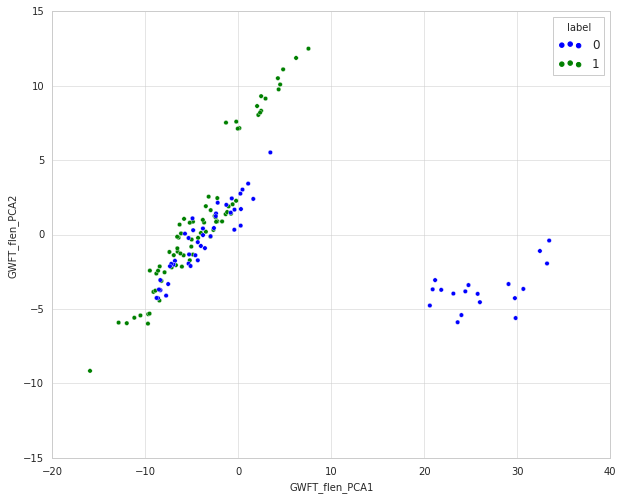

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'GWFT_flen_PCA1', y = 'GWFT_flen_PCA2', hue = 'label', data = Data_full_PCA )

In [ ]:

Cancer = Data_full_PCA[Data_full_PCA.label == 1]
Cancer

,Unnamed: 0,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
0,0,-2.252113,0.899453,0.019169,-22.626602,-0.955284,-4.154077,-1.035126,-3.663447,-0.765360,...,1.577601,-0.437137,-0.245068,0.502285,0.403958,-0.392424,-0.631680,-0.547160,0.175688,1
1,1,-4.870362,0.872972,-0.408866,10.580418,-0.033179,0.933630,-0.083309,0.131926,0.465117,...,0.257702,1.727577,-0.755605,1.381055,-0.730707,1.925221,1.448810,-1.597787,-0.213117,1
2,2,-3.479735,0.198917,-3.157495,-29.393621,-1.225883,-4.060452,-1.008121,-4.126151,-1.250710,...,-0.365554,0.237336,-0.835937,0.144068,-0.054625,-0.945028,-0.576254,-0.925104,0.658569,1
3,3,-0.600841,2.045409,-3.191008,-18.907390,-0.974975,-3.723416,-0.743967,-3.601837,-1.513645,...,2.325722,-1.091551,0.384515,0.891492,0.568381,0.501201,-0.298907,-0.502665,1.290628,1
4,4,-6.930095,-1.376692,1.074311,-14.833990,-0.117016,-0.285712,-1.786169,-2.420782,0.610925,...,-0.138448,-0.173962,0.076610,0.012057,-0.076024,0.063701,0.044871,0.248054,-0.183889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,-6.057092,-2.146754,0.295937,-9.668208,-0.490947,-1.481040,-0.639428,-2.230789,-0.789097,...,-0.453701,1.402250,-0.320087,0.784571,0.573255,-0.150250,1.109922,-0.087945,0.111817,1
71,71,-0.777380,1.410372,-1.959275,-9.273148,-0.665935,-2.496986,-0.875078,-2.095391,-0.884760,...,0.339182,0.114859,-0.336508,-0.188687,-0.345383,0.572254,0.781468,-0.377447,1.031644,1
72,72,-4.865728,-1.336803,1.908289,-2.793998,-0.484431,-1.585678,-0.840879,-1.503393,-0.176072,...,0.736763,4.153847,-1.260401,0.507235,-0.627303,-2.285861,-0.273952,1.569024,1.826531,1
73,73,-4.014446,0.118477,2.433876,42.752004,0.740307,3.317137,-1.256699,2.158762,1.760197,...,1.622031,-2.589691,-1.346965,1.810131,-0.622249,-0.202543,-1.229629,-1.509742,-0.127039,1


In [ ]:
Control = Data_full_PCA[Data_full_PCA.label == 0]
Control

,Unnamed: 0,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
75,75,-4.018383,-0.757717,2.177709,7.118510,-0.386308,0.374745,-0.314691,0.244826,0.595037,...,-0.963766,-1.295814,-1.301792,3.378483,0.832848,1.872070,-1.672805,-2.572067,0.092483,0
76,76,-2.206232,2.147376,1.023159,-14.301650,-0.738556,-1.630220,-1.325762,-2.784300,-1.058990,...,0.686771,1.822709,-0.017452,-0.171208,-0.028128,-0.319612,1.538790,-1.062935,-0.261789,0
77,77,3.451228,5.527877,1.905686,-10.459947,-1.016008,-1.535889,-1.036968,-2.378856,-1.099625,...,-0.531292,-0.421732,-1.729565,0.127243,-0.582404,0.735369,0.488991,-0.293494,1.658500,0
78,78,1.617483,2.404899,-1.609578,-5.253696,-0.079185,-1.825377,-1.480402,-2.880011,-0.464718,...,0.703693,0.365737,0.082336,-1.422906,0.646648,0.467292,0.665722,-0.545295,-0.603792,0
79,79,-5.283608,-1.324437,1.509932,-18.913304,-0.681590,-3.100279,-0.875271,-3.484430,-1.301766,...,1.783084,-1.423512,-1.298662,-0.182089,-1.658038,1.245686,0.275610,-0.320335,0.244635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,21.170894,-3.051210,-5.911851,14.702557,-0.416178,0.462885,-0.075963,0.424256,0.654389,...,-2.285225,-0.221851,-0.488331,1.760465,-1.155121,1.584240,-1.150324,0.102925,0.934707,0
133,133,21.826918,-3.706093,-5.474218,20.403415,-0.683521,0.537625,-0.766408,0.287333,0.153537,...,0.084059,1.218026,-2.273921,-0.575008,-0.744358,-0.401741,-0.216370,-0.689311,-0.393442,0
134,134,23.997792,-5.400871,-2.362513,22.249009,-0.289187,0.279221,-1.316839,2.084294,0.487301,...,-2.530112,2.344992,1.139719,1.689523,-1.413931,-0.341317,0.824800,-0.539348,0.142808,0
135,135,25.746313,-3.976045,-1.174804,9.364984,-0.590986,-0.505449,-0.135786,0.826366,-0.491360,...,-0.268737,0.642443,-1.697984,-0.089192,-1.489628,-0.508833,-1.464110,1.938426,1.268311,0


In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWFT_flen_PCA1', vdims=[ 'label'])
scatter.opts(color='GWFT_flen_PCA1', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#PCA1>20 -> Label 0 


In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWFT_flen_PCA2', vdims=[ 'label'])
scatter.opts(color='GWFT_flen_PCA2', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# PCA2>7 -> Label 1

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWFT_flen_PCA3', vdims=[ 'label'])
scatter.opts(color='GWFT_flen_PCA3', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWMD_PCA0', vdims=[ 'label'])
scatter.opts(color='GWMD_PCA0', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='TMD_PCA93', vdims=[ 'label'])
scatter.opts(color='TMD_PCA93', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2']]
y = Data_full_PCA.label

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X1_train, y1_train, X1_test, y1_test, train=True):
    if train:
        pred = clf.predict(X1_train)
        clf_report = pd.DataFrame(classification_report(y1_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y1_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y1_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X1_test)
        clf_report = pd.DataFrame(classification_report(y1_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y1_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y1_test, pred)}\n")

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = Data_full_PCA.GWFT_flen_PCA1
y = Data_full_PCA.label

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 66.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.619048  0.663158   0.809524      0.791479
recall      0.255814   1.000000  0.663158   0.627907      0.663158
f1-score    0.407407   0.764706  0.663158   0.586057      0.602981
support    43.000000  52.000000  0.663158  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[11 32]
 [ 0 52]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.657143  0.714286   0.828571      0.812245
recall      0.368421   1.000000  0.714286   0.684211      0.714286
f1-score    0.538462   0.793103  0.714286   0.665782      0.677908
support    19.000000  23.000000  0.714286  42.000000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 69.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.694444   0.694915  0.694737   0.694680      0.694702
recall      0.581395   0.788462  0.694737   0.684928      0.694737
f1-score    0.632911   0.738739  0.694737   0.685825      0.690838
support    43.000000  52.000000  0.694737  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[25 18]
 [11 41]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.823529   0.800000  0.809524   0.811765      0.810644
recall      0.736842   0.869565  0.809524   0.803204      0.809524
f1-score    0.777778   0.833333  0.809524   0.805556      0.808201
support    19.000000  23.000000  0.809524  42.000000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.682927   0.722222  0.705263   0.702575      0.704436
recall      0.651163   0.750000  0.705263   0.700581      0.705263
f1-score    0.666667   0.735849  0.705263   0.701258      0.704535
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[28 15]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.682927   0.722222  0.705263   0.702575      0.704436
recall      0.651163   0.750000  0.705263   0.700581      0.705263
f1-score    0.666667   0.735849  0.705263   0.701258      0.704535
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[28 15]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#LR model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 63.44


In [ ]:
# kNN model:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 64.33


In [ ]:
# RF model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 60.0


In [ ]:
# Importing the model:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 57.89


In [ ]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.65
N = 2 :: Score = 0.61
N = 3 :: Score = 0.61
N = 4 :: Score = 0.53
N = 5 :: Score = 0.64
N = 6 :: Score = 0.58
N = 7 :: Score = 0.62
N = 8 :: Score = 0.62
N = 9 :: Score = 0.58
N = 10 :: Score = 0.59
N = 11 :: Score = 0.62
N = 12 :: Score = 0.62
N = 13 :: Score = 0.65
N = 14 :: Score = 0.67
N = 15 :: Score = 0.62
N = 16 :: Score = 0.63
N = 17 :: Score = 0.64
N = 18 :: Score = 0.63
N = 19 :: Score = 0.63
N = 20 :: Score = 0.67


In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2','GWFT_flen_PCA3']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 74.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.743590   0.750000  0.747368   0.746795      0.747099
recall      0.674419   0.807692  0.747368   0.741055      0.747368
f1-score    0.707317   0.777778  0.747368   0.742547      0.745885
support    43.000000  52.000000  0.747368  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[29 14]
 [10 42]]

Test Result:
Accuracy Score: 76.19%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.764706   0.760000  0.761905   0.762353      0.762129
recall      0.684211   0.826087  0.761905   0.755149      0.761905
f1-score    0.722222   0.791667  0.761905   0.756944      0.760251
support    19.000000  23.000000  0.761905  42.000000     42.000000
___________________________

In [ ]:
# RF model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 64.0


In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.682927   0.722222  0.705263   0.702575      0.704436
recall      0.651163   0.750000  0.705263   0.700581      0.705263
f1-score    0.666667   0.735849  0.705263   0.701258      0.704535
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[28 15]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=1, coef0 = 1, C=70)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 69.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.675000   0.709091  0.694737   0.692045      0.693660
recall      0.627907   0.750000  0.694737   0.688953      0.694737
f1-score    0.650602   0.728972  0.694737   0.689787      0.693499
support    43.000000  52.000000  0.694737  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[27 16]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma=2, coef0 = 1, C=50)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.727273   0.693548  0.705263   0.710411      0.708813
recall      0.558140   0.826923  0.705263   0.692531      0.705263
f1-score    0.631579   0.754386  0.705263   0.692982      0.698800
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[24 19]
 [ 9 43]]

Test Result:
Accuracy Score: 78.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.812500   0.769231  0.785714   0.790865      0.788805
recall      0.684211   0.869565  0.785714   0.776888      0.785714
f1-score    0.742857   0.816327  0.785714   0.779592      0.783090
support    19.000000  23.000000  0.785714  42.000000     42.000000
___________________________

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

X = tf.placeholder(tf.float32, [None,95])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
A = Data_full_PCA.drop(columns = 'Unnamed: 0')
A

,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,GWMD_PCA6,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
0,-2.252113,0.899453,0.019169,-22.626602,-0.955284,-4.154077,-1.035126,-3.663447,-0.765360,1.007548,...,1.577601,-0.437137,-0.245068,0.502285,0.403958,-0.392424,-0.631680,-0.547160,0.175688,1
1,-4.870362,0.872972,-0.408866,10.580418,-0.033179,0.933630,-0.083309,0.131926,0.465117,0.401134,...,0.257702,1.727577,-0.755605,1.381055,-0.730707,1.925221,1.448810,-1.597787,-0.213117,1
2,-3.479735,0.198917,-3.157495,-29.393621,-1.225883,-4.060452,-1.008121,-4.126151,-1.250710,-0.014787,...,-0.365554,0.237336,-0.835937,0.144068,-0.054625,-0.945028,-0.576254,-0.925104,0.658569,1
3,-0.600841,2.045409,-3.191008,-18.907390,-0.974975,-3.723416,-0.743967,-3.601837,-1.513645,0.312149,...,2.325722,-1.091551,0.384515,0.891492,0.568381,0.501201,-0.298907,-0.502665,1.290628,1
4,-6.930095,-1.376692,1.074311,-14.833990,-0.117016,-0.285712,-1.786169,-2.420782,0.610925,-0.181394,...,-0.138448,-0.173962,0.076610,0.012057,-0.076024,0.063701,0.044871,0.248054,-0.183889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,21.170894,-3.051210,-5.911851,14.702557,-0.416178,0.462885,-0.075963,0.424256,0.654389,1.098050,...,-2.285225,-0.221851,-0.488331,1.760465,-1.155121,1.584240,-1.150324,0.102925,0.934707,0
133,21.826918,-3.706093,-5.474218,20.403415,-0.683521,0.537625,-0.766408,0.287333,0.153537,0.990772,...,0.084059,1.218026,-2.273921,-0.575008,-0.744358,-0.401741,-0.216370,-0.689311,-0.393442,0
134,23.997792,-5.400871,-2.362513,22.249009,-0.289187,0.279221,-1.316839,2.084294,0.487301,1.710864,...,-2.530112,2.344992,1.139719,1.689523,-1.413931,-0.341317,0.824800,-0.539348,0.142808,0
135,25.746313,-3.976045,-1.174804,9.364984,-0.590986,-0.505449,-0.135786,0.826366,-0.491360,0.869414,...,-0.268737,0.642443,-1.697984,-0.089192,-1.489628,-0.508833,-1.464110,1.938426,1.268311,0


In [ ]:
train,test = train_test_split(A, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (95, 173)
Testing Data : (42, 173)


In [ ]:
train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]
train_x = train_data.iloc[:,1:]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,1:]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (95, 171)
Testing Data : (42, 171)


In [ ]:
train_y = train_data.iloc[:,:1]
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,:1]
print("Testing Data :", test_y.shape)

Training Data : (95, 1)
Testing Data : (42, 1)


In [ ]:
X = tf.placeholder(tf.float32, [None,171])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
# weight
W = tf.Variable(tf.random_normal([171,1], seed=0), name='weight')
# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

In [ ]:
logits = tf.matmul(X,W) + b

In [ ]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

In [ ]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 1.218	Acc: 0.00%
Step:  1000	Loss: -99.795	Acc: 0.00%
Step:  2000	Loss: -199.966	Acc: 0.00%
Step:  3000	Loss: -300.128	Acc: 0.00%
Step:  4000	Loss: -400.289	Acc: 0.00%
Step:  5000	Loss: -500.449	Acc: 0.00%
Step:  6000	Loss: -600.609	Acc: 0.00%
Step:  7000	Loss: -700.767	Acc: 0.00%
Step:  8000	Loss: -800.925	Acc: 0.00%
Step:  9000	Loss: -901.082	Acc: 0.00%
Step: 10000	Loss: -1001.238	Acc: 0.00%
Model Prediction = 0.0
Test Prediction = 0.0


NN Pytorch 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = A.iloc[:, 0:-1]
y = A.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(91, 172)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 136
LEARNING_RATE = 0.001

In [ ]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 172
        self.layer_1 = nn.Linear(172, 136) # 172 la so cot cua data, 136 la so hang
        self.layer_2 = nn.Linear(136, 136)
        self.layer_out = nn.Linear(136, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(136)
        self.batchnorm2 = nn.BatchNorm1d(136)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


BinaryClassification(
  (layer_1): Linear(in_features=172, out_features=136, bias=True)
  (layer_2): Linear(in_features=136, out_features=136, bias=True)
  (layer_out): Linear(in_features=136, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(136, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(136, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.76240 | Acc: 49.000
Epoch 002: | Loss: 0.59570 | Acc: 71.000
Epoch 003: | Loss: 0.46228 | Acc: 87.000
Epoch 004: | Loss: 0.36481 | Acc: 95.000
Epoch 005: | Loss: 0.28094 | Acc: 99.000
Epoch 006: | Loss: 0.23903 | Acc: 99.000
Epoch 007: | Loss: 0.19936 | Acc: 100.000
Epoch 008: | Loss: 0.16471 | Acc: 100.000
Epoch 009: | Loss: 0.14545 | Acc: 100.000
Epoch 010: | Loss: 0.12086 | Acc: 100.000
Epoch 011: | Loss: 0.10306 | Acc: 100.000
Epoch 012: | Loss: 0.08764 | Acc: 100.000
Epoch 013: | Loss: 0.07685 | Acc: 100.000
Epoch 014: | Loss: 0.06642 | Acc: 100.000
Epoch 015: | Loss: 0.05763 | Acc: 100.000
Epoch 016: | Loss: 0.05175 | Acc: 100.000
Epoch 017: | Loss: 0.04571 | Acc: 100.000
Epoch 018: | Loss: 0.03881 | Acc: 100.000
Epoch 019: | Loss: 0.03499 | Acc: 100.000
Epoch 020: | Loss: 0.03162 | Acc: 100.000
Epoch 021: | Loss: 0.02874 | Acc: 100.000
Epoch 022: | Loss: 0.02626 | Acc: 100.000
Epoch 023: | Loss: 0.02361 | Acc: 100.000
Epoch 024: | Loss: 0.02045 | Acc: 100.00

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
confusion_matrix(y_test, y_pred_list)

array([[12,  9],
       [ 9, 16]])

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        21
           1       0.64      0.64      0.64        25

    accuracy                           0.61        46
   macro avg       0.61      0.61      0.61        46
weighted avg       0.61      0.61      0.61        46



In [ ]:
X = Data_GWFT_flen_cleaned.drop(columns = ['Unnamed: 0'])
y = Data_Result_cleaned.label_number


In [ ]:
X.shape

(137, 151)

In [ ]:
X.head()

,GWFT_flen_0,GWFT_flen_1,GWFT_flen_2,GWFT_flen_3,GWFT_flen_4,GWFT_flen_5,GWFT_flen_6,GWFT_flen_7,GWFT_flen_8,GWFT_flen_9,...,GWFT_flen_141,GWFT_flen_142,GWFT_flen_143,GWFT_flen_144,GWFT_flen_145,GWFT_flen_146,GWFT_flen_147,GWFT_flen_148,GWFT_flen_149,GWFT_flen_150
0,0.002710,0.002886,0.002950,0.003003,0.003073,0.003121,0.003270,0.003491,0.003869,0.004296,...,0.000284,0.000276,0.000268,0.000264,0.000273,0.000253,0.000258,0.000260,0.000260,0.000256
1,0.002775,0.002935,0.003001,0.003032,0.003025,0.003097,0.003197,0.003473,0.003816,0.004311,...,0.000234,0.000235,0.000243,0.000240,0.000232,0.000238,0.000225,0.000226,0.000228,0.000231
2,0.002662,0.002846,0.002976,0.003028,0.003078,0.003089,0.003210,0.003379,0.003699,0.004088,...,0.000209,0.000205,0.000199,0.000202,0.000201,0.000206,0.000199,0.000201,0.000190,0.000182
3,0.002393,0.002587,0.002630,0.002664,0.002724,0.002731,0.002830,0.002988,0.003278,0.003638,...,0.000252,0.000248,0.000253,0.000250,0.000257,0.000252,0.000245,0.000241,0.000233,0.000226
4,0.003081,0.003278,0.003464,0.003579,0.003681,0.003866,0.004053,0.004390,0.004823,0.005287,...,0.000212,0.000216,0.000219,0.000213,0.000218,0.000220,0.000207,0.000207,0.000205,0.000209


Gen Selection 

In [ ]:
!pip install ITMO_FS

     |████████████████████████████████| 70 kB 5.6 MB/s 
     |████████████████████████████████| 121 kB 26.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quadprog: filename=quadprog-0.1.11-cp37-cp37m-linux_x86_64.whl size=290776 sha256=66f77a4803fbe8b7d251cab19da7b88131757dae068ddb61895c099bdd0e4f72
  Stored in directory: /root/.cache/pip/wheels/4a/4e/d7/41034ea11aeef1266df3cae546116cb6094e955c41ae3e2589
Successfully built quadprog


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from ITMO_FS.embedded import MOS


In [ ]:
X

,GWFT_flen_0,GWFT_flen_1,GWFT_flen_2,GWFT_flen_3,GWFT_flen_4,GWFT_flen_5,GWFT_flen_6,GWFT_flen_7,GWFT_flen_8,GWFT_flen_9,...,GWFT_flen_141,GWFT_flen_142,GWFT_flen_143,GWFT_flen_144,GWFT_flen_145,GWFT_flen_146,GWFT_flen_147,GWFT_flen_148,GWFT_flen_149,GWFT_flen_150
0,0.002710,0.002886,0.002950,0.003003,0.003073,0.003121,0.003270,0.003491,0.003869,0.004296,...,0.000284,0.000276,0.000268,0.000264,0.000273,0.000253,0.000258,0.000260,0.000260,0.000256
1,0.002775,0.002935,0.003001,0.003032,0.003025,0.003097,0.003197,0.003473,0.003816,0.004311,...,0.000234,0.000235,0.000243,0.000240,0.000232,0.000238,0.000225,0.000226,0.000228,0.000231
2,0.002662,0.002846,0.002976,0.003028,0.003078,0.003089,0.003210,0.003379,0.003699,0.004088,...,0.000209,0.000205,0.000199,0.000202,0.000201,0.000206,0.000199,0.000201,0.000190,0.000182
3,0.002393,0.002587,0.002630,0.002664,0.002724,0.002731,0.002830,0.002988,0.003278,0.003638,...,0.000252,0.000248,0.000253,0.000250,0.000257,0.000252,0.000245,0.000241,0.000233,0.000226
4,0.003081,0.003278,0.003464,0.003579,0.003681,0.003866,0.004053,0.004390,0.004823,0.005287,...,0.000212,0.000216,0.000219,0.000213,0.000218,0.000220,0.000207,0.000207,0.000205,0.000209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.000600,0.000718,0.000800,0.000894,0.000969,0.001006,0.001039,0.001093,0.001084,0.001132,...,0.000336,0.000327,0.000331,0.000311,0.000308,0.000308,0.000294,0.000300,0.000298,0.000285
133,0.000609,0.000760,0.000883,0.000955,0.001017,0.001077,0.001102,0.001078,0.001119,0.001180,...,0.000339,0.000322,0.000311,0.000295,0.000291,0.000305,0.000310,0.000312,0.000278,0.000277
134,0.000679,0.000815,0.000957,0.001037,0.001079,0.001149,0.001170,0.001202,0.001189,0.001287,...,0.000356,0.000347,0.000325,0.000315,0.000304,0.000304,0.000300,0.000309,0.000296,0.000284
135,0.000611,0.000712,0.000809,0.000927,0.001013,0.001033,0.001075,0.001101,0.001137,0.001156,...,0.000413,0.000396,0.000369,0.000349,0.000320,0.000314,0.000317,0.000351,0.000316,0.000303


In [ ]:
y

LBMB011    1
LBMB043    1
LBMB198    1
LBMB200    1
LBMB203    1
          ..
LBGS099    0
LBGS106    0
LBGS109    0
CRCC12     0
LBGS111    0
Name: label_number, Length: 137, dtype: int64

In [ ]:
sel = MOS()
trX = sel.fit_transform(X, y) #Selection 

In [ ]:
cl1 = SGDClassifier()
cl1.fit(X, y)
cl1.score(X, y)

0.45255474452554745

In [ ]:
cl2 = SGDClassifier()
cl2.fit(trX, y)
cl2.score(trX, y)

0.5474452554744526

In [ ]:
A

,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,GWMD_PCA6,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
0,-2.252113,0.899453,0.019169,-22.626602,-0.955284,-4.154077,-1.035126,-3.663447,-0.765360,1.007548,...,1.577601,-0.437137,-0.245068,0.502285,0.403958,-0.392424,-0.631680,-0.547160,0.175688,1
1,-4.870362,0.872972,-0.408866,10.580418,-0.033179,0.933630,-0.083309,0.131926,0.465117,0.401134,...,0.257702,1.727577,-0.755605,1.381055,-0.730707,1.925221,1.448810,-1.597787,-0.213117,1
2,-3.479735,0.198917,-3.157495,-29.393621,-1.225883,-4.060452,-1.008121,-4.126151,-1.250710,-0.014787,...,-0.365554,0.237336,-0.835937,0.144068,-0.054625,-0.945028,-0.576254,-0.925104,0.658569,1
3,-0.600841,2.045409,-3.191008,-18.907390,-0.974975,-3.723416,-0.743967,-3.601837,-1.513645,0.312149,...,2.325722,-1.091551,0.384515,0.891492,0.568381,0.501201,-0.298907,-0.502665,1.290628,1
4,-6.930095,-1.376692,1.074311,-14.833990,-0.117016,-0.285712,-1.786169,-2.420782,0.610925,-0.181394,...,-0.138448,-0.173962,0.076610,0.012057,-0.076024,0.063701,0.044871,0.248054,-0.183889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,21.170894,-3.051210,-5.911851,14.702557,-0.416178,0.462885,-0.075963,0.424256,0.654389,1.098050,...,-2.285225,-0.221851,-0.488331,1.760465,-1.155121,1.584240,-1.150324,0.102925,0.934707,0
133,21.826918,-3.706093,-5.474218,20.403415,-0.683521,0.537625,-0.766408,0.287333,0.153537,0.990772,...,0.084059,1.218026,-2.273921,-0.575008,-0.744358,-0.401741,-0.216370,-0.689311,-0.393442,0
134,23.997792,-5.400871,-2.362513,22.249009,-0.289187,0.279221,-1.316839,2.084294,0.487301,1.710864,...,-2.530112,2.344992,1.139719,1.689523,-1.413931,-0.341317,0.824800,-0.539348,0.142808,0
135,25.746313,-3.976045,-1.174804,9.364984,-0.590986,-0.505449,-0.135786,0.826366,-0.491360,0.869414,...,-0.268737,0.642443,-1.697984,-0.089192,-1.489628,-0.508833,-1.464110,1.938426,1.268311,0


In [ ]:
X1 = A.drop(columns = ['label'])
X1

,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,GWMD_PCA6,...,TMD_PCA92,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101
0,-2.252113,0.899453,0.019169,-22.626602,-0.955284,-4.154077,-1.035126,-3.663447,-0.765360,1.007548,...,-1.351406,1.577601,-0.437137,-0.245068,0.502285,0.403958,-0.392424,-0.631680,-0.547160,0.175688
1,-4.870362,0.872972,-0.408866,10.580418,-0.033179,0.933630,-0.083309,0.131926,0.465117,0.401134,...,-0.486818,0.257702,1.727577,-0.755605,1.381055,-0.730707,1.925221,1.448810,-1.597787,-0.213117
2,-3.479735,0.198917,-3.157495,-29.393621,-1.225883,-4.060452,-1.008121,-4.126151,-1.250710,-0.014787,...,-0.624860,-0.365554,0.237336,-0.835937,0.144068,-0.054625,-0.945028,-0.576254,-0.925104,0.658569
3,-0.600841,2.045409,-3.191008,-18.907390,-0.974975,-3.723416,-0.743967,-3.601837,-1.513645,0.312149,...,-1.297407,2.325722,-1.091551,0.384515,0.891492,0.568381,0.501201,-0.298907,-0.502665,1.290628
4,-6.930095,-1.376692,1.074311,-14.833990,-0.117016,-0.285712,-1.786169,-2.420782,0.610925,-0.181394,...,-0.181270,-0.138448,-0.173962,0.076610,0.012057,-0.076024,0.063701,0.044871,0.248054,-0.183889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,21.170894,-3.051210,-5.911851,14.702557,-0.416178,0.462885,-0.075963,0.424256,0.654389,1.098050,...,-0.291762,-2.285225,-0.221851,-0.488331,1.760465,-1.155121,1.584240,-1.150324,0.102925,0.934707
133,21.826918,-3.706093,-5.474218,20.403415,-0.683521,0.537625,-0.766408,0.287333,0.153537,0.990772,...,-0.487535,0.084059,1.218026,-2.273921,-0.575008,-0.744358,-0.401741,-0.216370,-0.689311,-0.393442
134,23.997792,-5.400871,-2.362513,22.249009,-0.289187,0.279221,-1.316839,2.084294,0.487301,1.710864,...,-2.437836,-2.530112,2.344992,1.139719,1.689523,-1.413931,-0.341317,0.824800,-0.539348,0.142808
135,25.746313,-3.976045,-1.174804,9.364984,-0.590986,-0.505449,-0.135786,0.826366,-0.491360,0.869414,...,-1.988393,-0.268737,0.642443,-1.697984,-0.089192,-1.489628,-0.508833,-1.464110,1.938426,1.268311


In [ ]:
sel = MOS()
trX = sel.fit_transform(X1, y) #Selection 

In [ ]:
cl1 = SGDClassifier()
cl1.fit(X1, y)
cl1.score(X1, y)

1.0

In [ ]:
cl2 = SGDClassifier()
cl2.fit(trX, y)
cl2.score(trX, y)

1.0